import library

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Get the data set from Kaggle

In [3]:
df = pd.read_csv('/Users/manoz/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


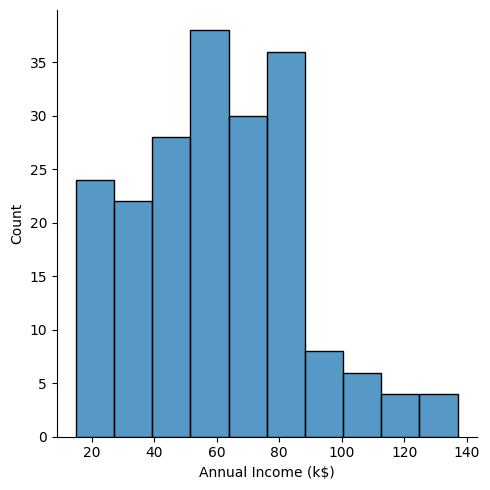

In [5]:
sb.displot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

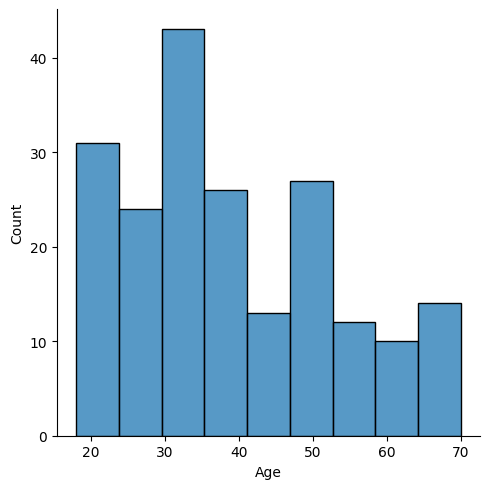

<Figure size 640x480 with 0 Axes>

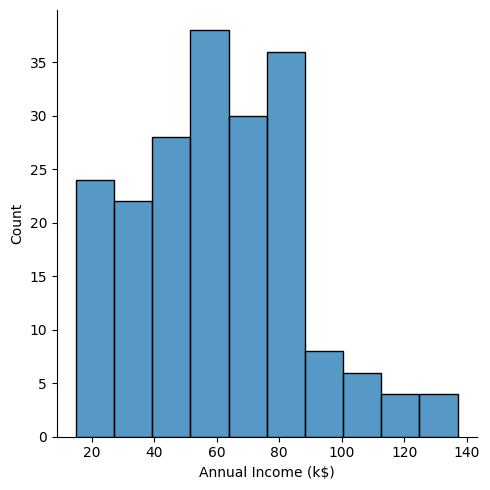

<Figure size 640x480 with 0 Axes>

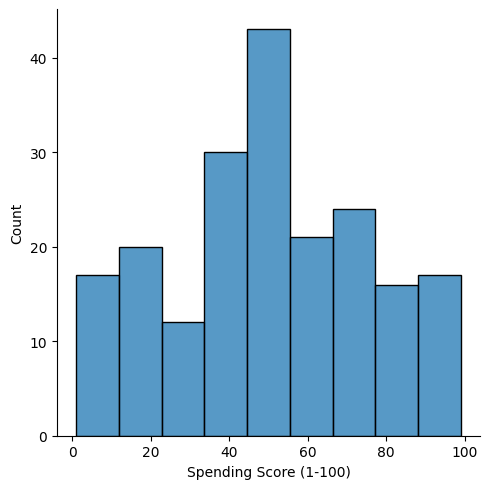

In [7]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.displot(df[i]);

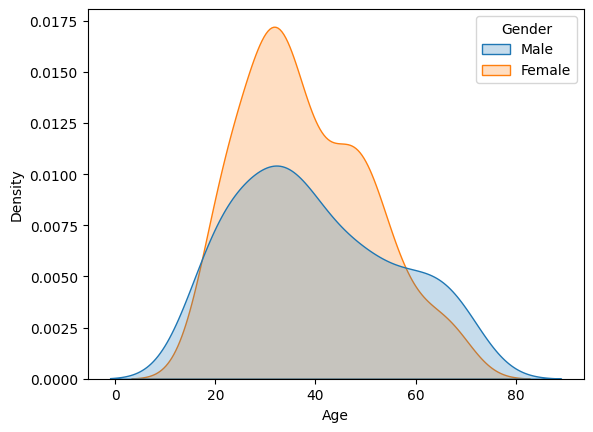

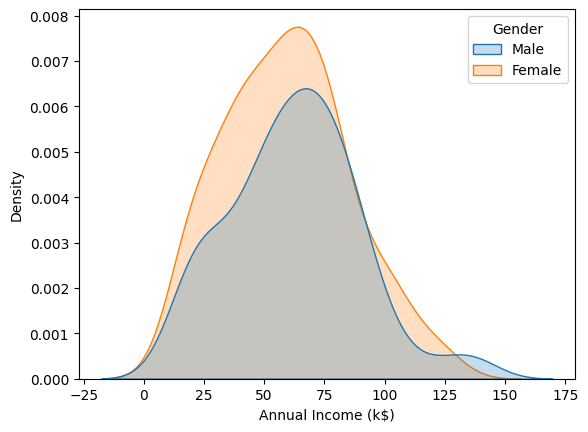

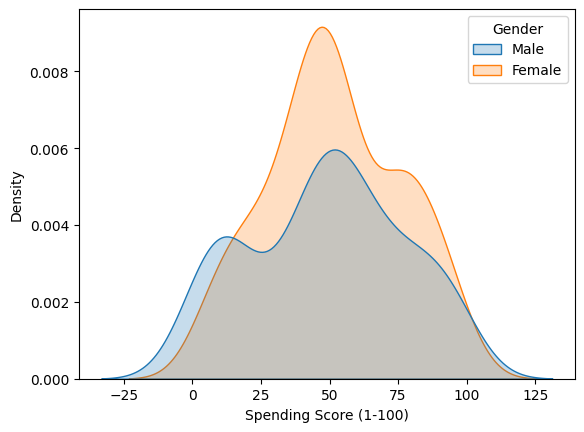

In [8]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.kdeplot(x=df[i],fill = True, hue = df['Gender']);




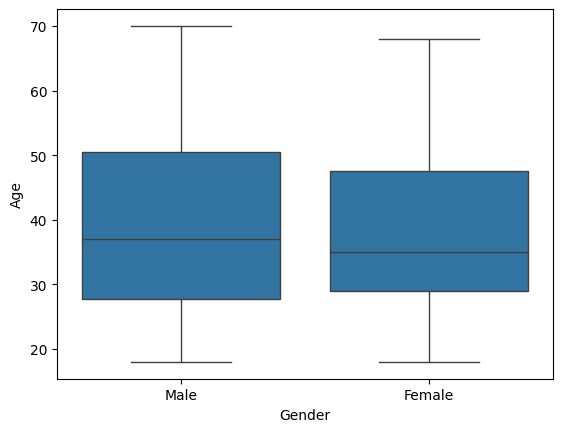

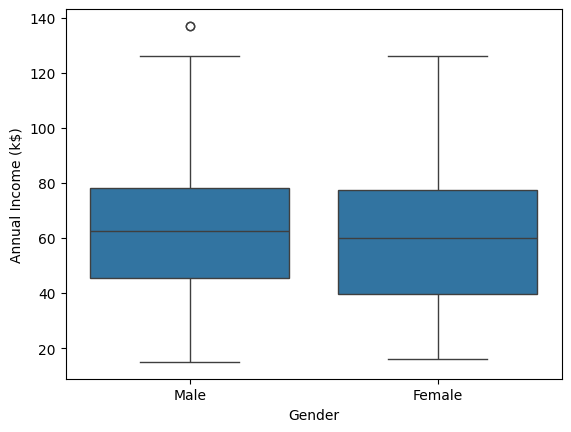

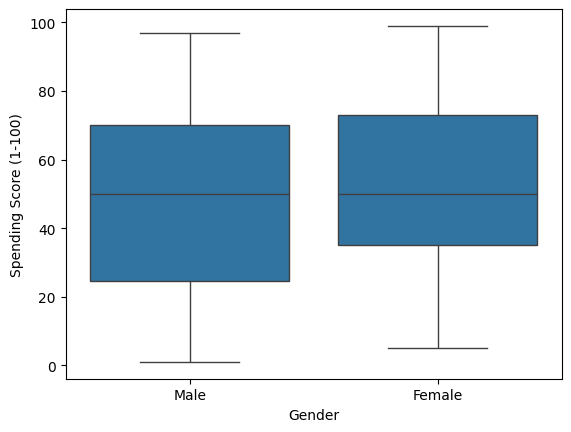

In [9]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.boxplot(data=df,x='Gender', y=i);

In [10]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

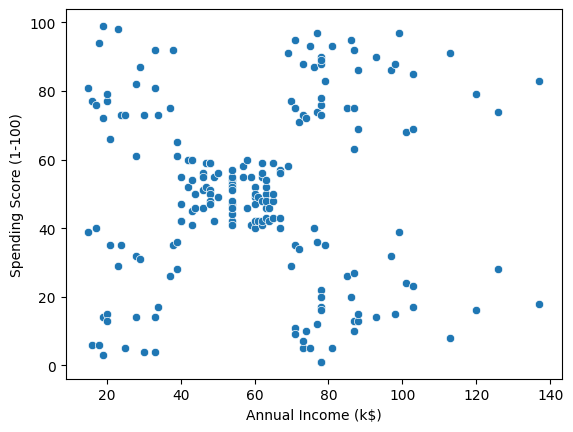

In [11]:
sb.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

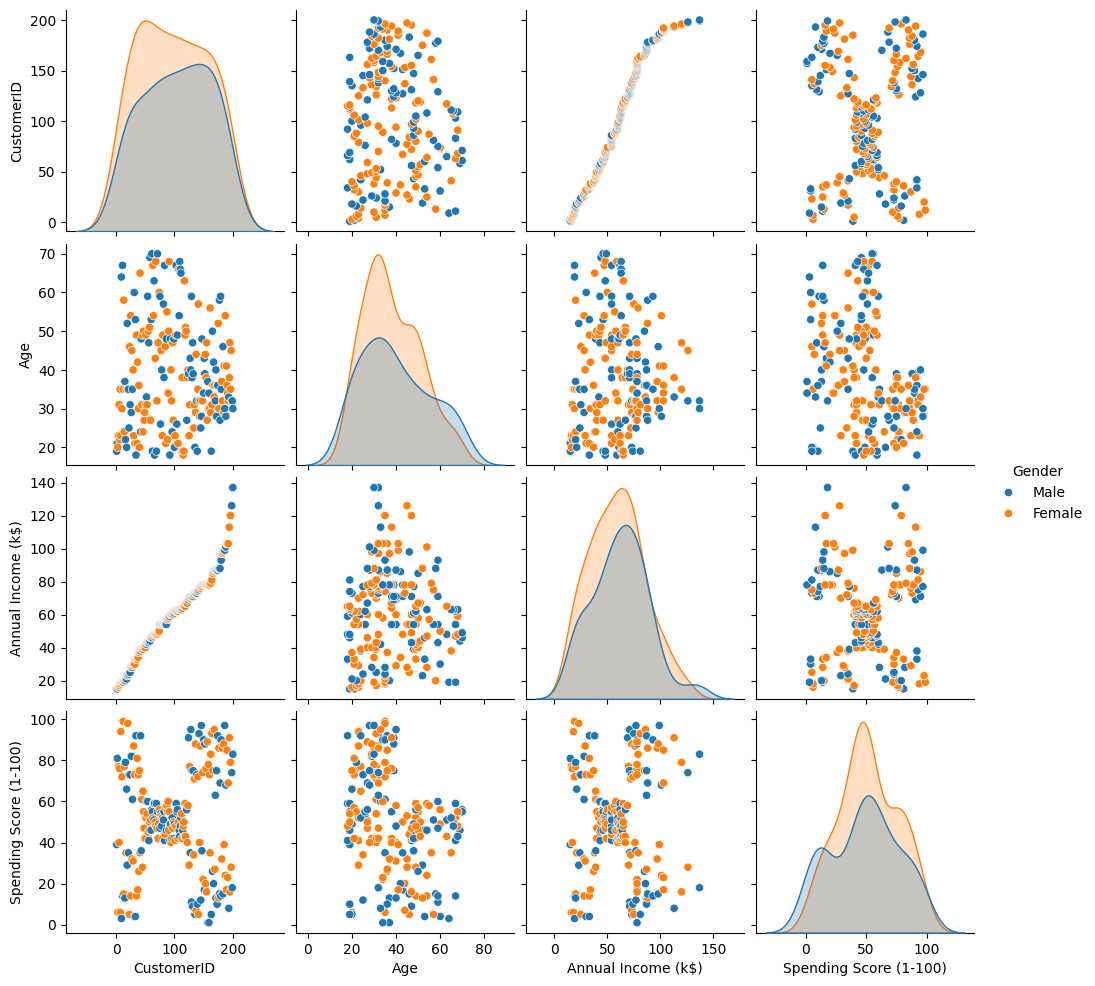

In [12]:
#df=df.drop('CustomerID', axis=1)
sb.pairplot(df,hue='Gender')

In [13]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df_numeric = df.drop(columns=['Gender'])
correlation=df_numeric.corr()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

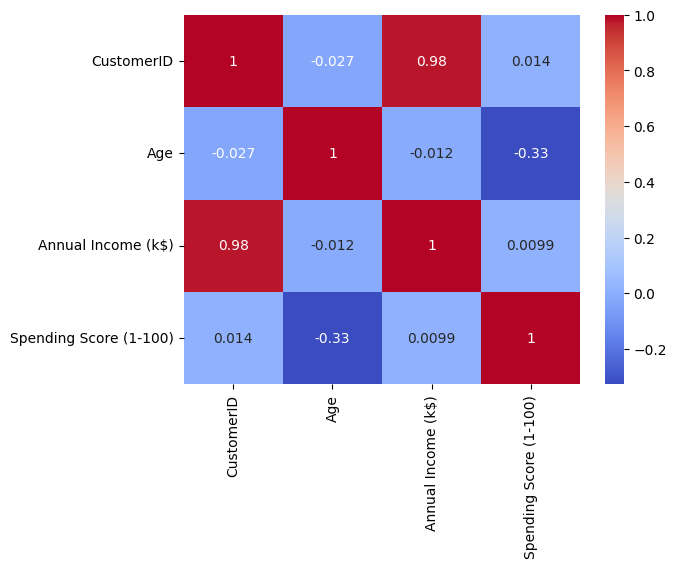

In [15]:
sb.heatmap(correlation, annot=True,cmap='coolwarm')

Clusturing- Univariate, Bivariata and Multivariate

In [16]:
clustering1= KMeans(n_clusters=3)

In [17]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [20]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
0    58
1    56
Name: count, dtype: int64

In [21]:
clustering1.inertia_

25640.457784396836

In [22]:
inertia_score=[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(Kmeans.inertia_)

In [23]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8976.06866502004,
 5496.533937621833,
 4389.299122807018,
 2897.7750305250306,
 2442.362354312355,
 1772.930303030303]

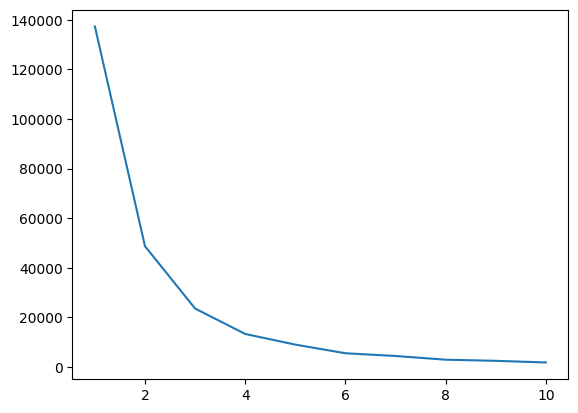

In [24]:
plt.plot(range(1,11),inertia_score)

In [25]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


Bivariate Clustering

In [26]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


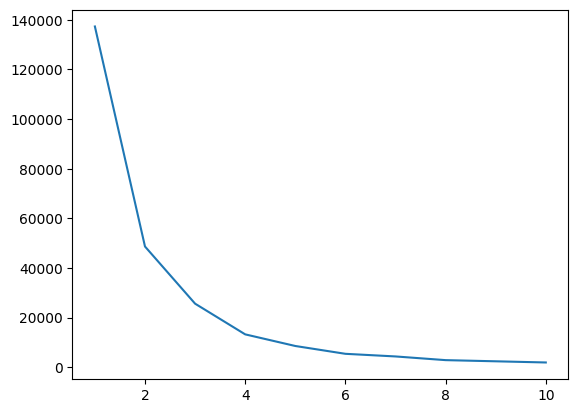

In [27]:
inertia_score2=[]
for i in range(1,11):
    Kmeans2 = KMeans(n_clusters=i)
    Kmeans2.fit(df[['Annual Income (k$)']])
    inertia_score2.append(Kmeans2.inertia_)
inertia_score
plt.plot(range(1,11),inertia_score2)

In [28]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

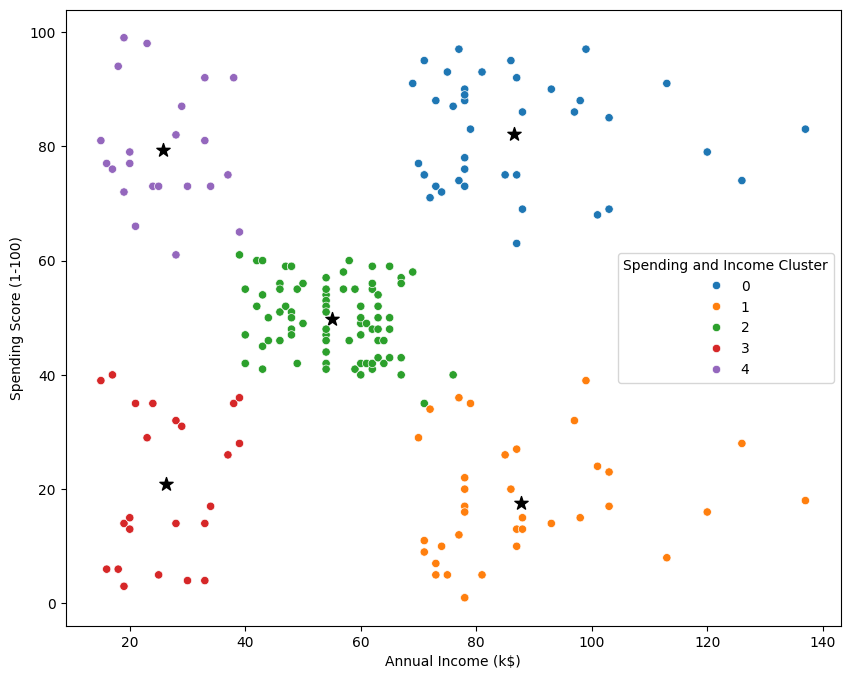

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sb.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [30]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.472222,0.527778
2,0.587500,0.412500
3,0.608696,0.391304
4,0.590909,0.409091


In [31]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,40.666667,87.750000,17.583333
2,42.937500,55.087500,49.712500
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [32]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [33]:
scale = StandardScaler()


In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [35]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,3,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,3,False


In [36]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [37]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [38]:
dff = scale.fit_transform(dff)

In [39]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [55]:
clustering3 = KMeans(n_clusters=5)
clustering3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Multivariate Cluster'] = clustering3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,1,Male,19,15,39,0,3,1
1,2,Male,21,15,81,0,4,4
2,3,Female,20,16,6,0,3,1
3,4,Female,23,16,77,0,4,4
4,5,Female,31,17,40,0,3,1


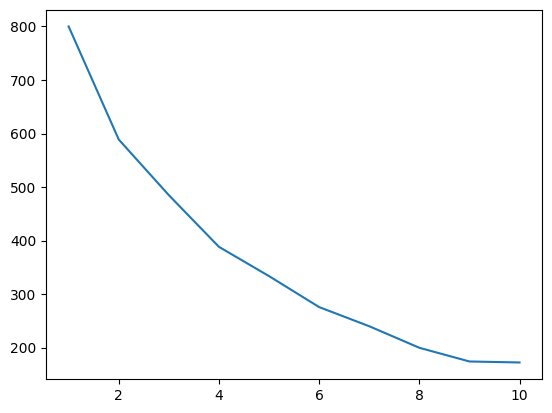

In [52]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,1,1


In [56]:
# Calculate the mean values of the features for each cluster
# Calculate the mean values of the features for each cluster
try:
    cluster_analysis = df.groupby('Multivariate Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    print(cluster_analysis)
except KeyError as e:
    print(f"KeyError: {e}. Available columns are: {df.columns}")


                            Age  Annual Income (k$)  Spending Score (1-100)
Multivariate Cluster                                                       
0                     42.716049           55.296296               49.518519
1                     45.217391           26.304348               20.913043
2                     32.692308           86.538462               82.128205
3                     41.114286           88.200000               17.114286
4                     25.272727           25.727273               79.363636


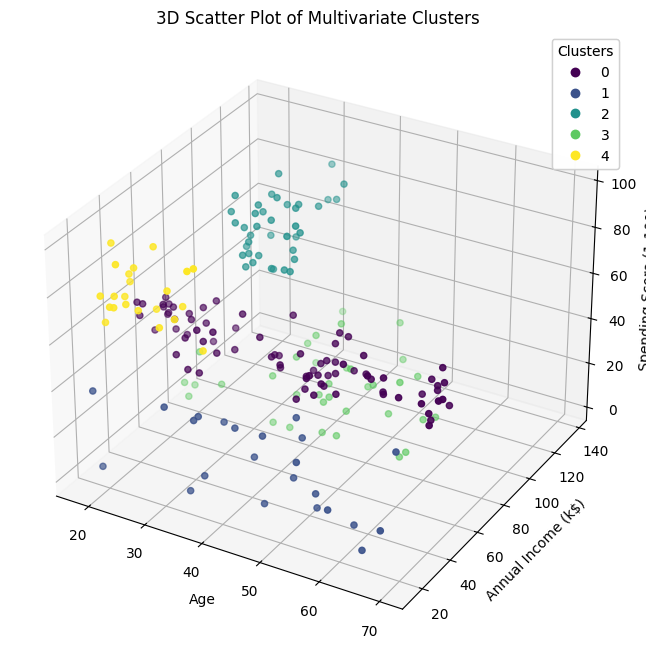

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Multivariate Cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Scatter Plot of Multivariate Clusters')
plt.show()

In [ ]:
df.to_csv('Clustering.csv')